In [64]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## Prep district_lines ready for polygon map

In [65]:
district_lines=gpd.read_file('../data/Council_District_Outlines.geojson')
print(district_lines.crs)
district_lines.head( )

epsg:4326


,first_name,email_address,business_phone_number,last_name,position,council_district,geometry
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."


In [66]:
type(district_lines)

geopandas.geodataframe.GeoDataFrame

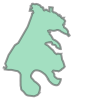

In [67]:
district_lines.loc[0,'geometry']

In [68]:
print(district_lines.loc[0,'geometry'])

MULTIPOLYGON (((-86.90738248774343 36.39051512831934, -86.90724599759135 36.39047599606477, -86.90712077830904 36.39045935427112, -86.90709288961023 36.39045681635265, -86.90709126795993 36.39045668887019, -86.90702283759474 36.39045129807835, -86.90678530821764 36.39035858378855, -86.90655049716739 36.39026584867516, -86.90653868788078 36.39026021552043, -86.90633732812569 36.39016416092638, -86.9060887028967 36.39005175055225, -86.90589755383 36.38997407006486, -86.90573403546252 36.38993573813269, -86.9056059989984 36.38991032572337, -86.90551813423791 36.38988861286117, -86.90550242243242 36.38988473020141, -86.90549671584363 36.38988081389702, -86.90540106082254 36.3898151673499, -86.90531603104739 36.38974767979737, -86.905287698764 36.38972706835072, -86.90521736238897 36.38967589911619, -86.90511074174812 36.38962175808647, -86.90491989623912 36.38957044419436, -86.90484888140314 36.38955083674644, -86.90477266052591 36.38952979170336, -86.90458961699873 36.38944765350065, -86.

## OUTLINE MAP OF COUNCIL DISTRICTS

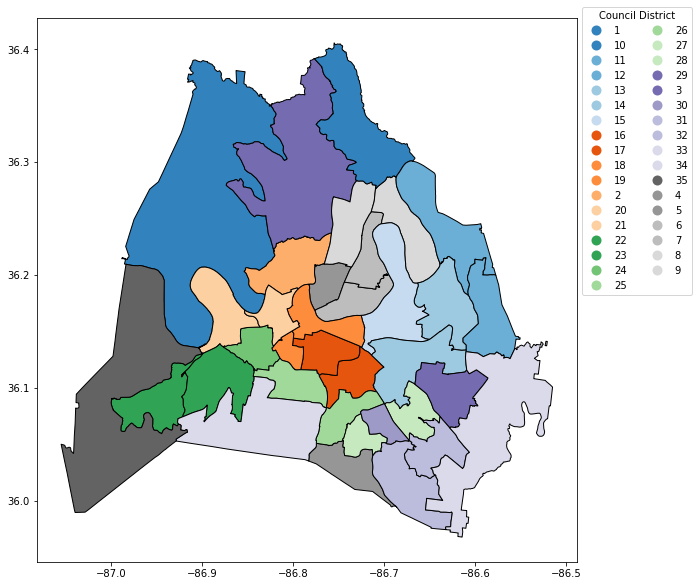

In [69]:
district_map = {'title': 'Council District', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

district_lines.plot(column = 'council_district', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = district_map, 
              cmap = 'tab20c')
plt.show()

## METRO COUNCIL DISTRICTS OUTLINED AND SHADED BY COSTS OF METRO PUBLIC WORKS CAPITAL PROJECTS

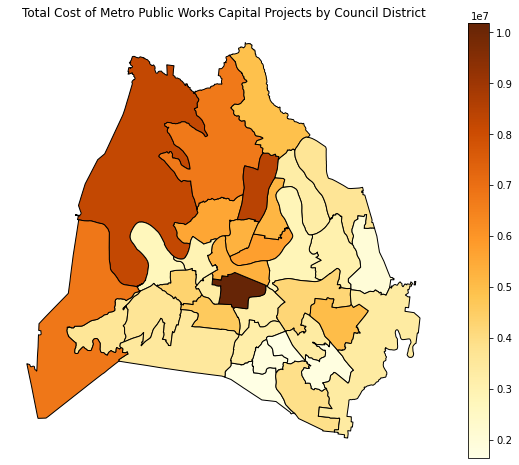

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
projects.plot(column='SumCost',
            cmap='YlOrBr',
            edgecolor = 'black',
              legend=True,
            ax=ax)
plt.title('Total Cost of Metro Public Works Capital Projects by Council District', fontsize = 12)
ax.axis('off');

# Prep capital_project point map

In [71]:
capital_projects = pd.read_csv('../data/Metro_Public_Works_Capital_Projects.csv')
print(capital_projects.shape)
capital_projects.head(3)

(2490, 30)


,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Project SubType,Priority,Phase,PPA Number,x Coordinate,y Coordinate,Latitude,Longitude,Map URL,Mapped Location
0,2130,PV-SP-18194,Paving,Paving,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,ROADWAY RESURFACING PAVING PROJECT ON 'CHANDLE...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",12,151300.0,...,New,Low,Future,355-02017,1.795970e+06,679955.320666,36.199881,-86.584757,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.19988132, -86.58475707)"
1,5939,NaN,Culvert,Culvert Replacement,3529 Baxter Road - Service Request,BAXTER RD Between WHITES CREEK PIKE And BIDWEL...,Culvert Replacement Project - The work will co...,To replace culvert that has caused the roadway...,01,143966.0,...,Replacement,High,Complete,1240-04119,1.708175e+06,735827.004244,36.351550,-86.884003,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.35154962, -86.88400289)"
2,5052,NaN,Sidewalk,New Sidewalk,27th Avenue North Sidewalk,27TH AVE N - WEST END AVE - POSTON AVE,New sidewalks on both side of 27th Avenue North,To provide connectivity to Centennial Park and...,21,150000.0,...,New,Medium,Complete,304-01015,1.728642e+06,661064.698090,36.146672,-86.812391,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.14667164, -86.81239071)"


In [72]:
capital_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CP ID             2490 non-null   int64  
 1   Project Number    1367 non-null   object 
 2   Project Category  2490 non-null   object 
 3   Project Type      2490 non-null   object 
 4   Project Name      2490 non-null   object 
 5   Project Location  2490 non-null   object 
 6   Description       2485 non-null   object 
 7   Justification     2484 non-null   object 
 8   Council District  2488 non-null   object 
 9   Plan Cost         2490 non-null   float64
 10  Estimated Cost    2490 non-null   float64
 11  Actual Cost       2490 non-null   float64
 12  Project Cost      2490 non-null   float64
 13  Percent Spent     2490 non-null   int64  
 14  Estimated Start   1621 non-null   object 
 15  Estimated End     1636 non-null   object 
 16  Actual Start      1979 non-null   object 


In [73]:
capital_projects['geometry'] = capital_projects.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
capital_projects.head(3)

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Priority,Phase,PPA Number,x Coordinate,y Coordinate,Latitude,Longitude,Map URL,Mapped Location,geometry
0,2130,PV-SP-18194,Paving,Paving,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,ROADWAY RESURFACING PAVING PROJECT ON 'CHANDLE...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",12,151300.0,...,Low,Future,355-02017,1.795970e+06,679955.320666,36.199881,-86.584757,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.19988132, -86.58475707)",POINT (-86.58475706999999 36.19988132)
1,5939,NaN,Culvert,Culvert Replacement,3529 Baxter Road - Service Request,BAXTER RD Between WHITES CREEK PIKE And BIDWEL...,Culvert Replacement Project - The work will co...,To replace culvert that has caused the roadway...,01,143966.0,...,High,Complete,1240-04119,1.708175e+06,735827.004244,36.351550,-86.884003,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.35154962, -86.88400289)",POINT (-86.88400289 36.35154962)
2,5052,NaN,Sidewalk,New Sidewalk,27th Avenue North Sidewalk,27TH AVE N - WEST END AVE - POSTON AVE,New sidewalks on both side of 27th Avenue North,To provide connectivity to Centennial Park and...,21,150000.0,...,Medium,Complete,304-01015,1.728642e+06,661064.698090,36.146672,-86.812391,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.14667164, -86.81239071)",POINT (-86.81239071 36.14667164)


# Make 'Council District' column values match (01 vs 1, etc)

In [74]:
capital_projects['Council District']=capital_projects['Council District'].replace(['01'],['1'])
capital_projects['Council District']=capital_projects['Council District'].replace(['02'],['2'])
capital_projects['Council District']=capital_projects['Council District'].replace(['03'],['3'])
capital_projects['Council District']=capital_projects['Council District'].replace(['04'],['4'])
capital_projects['Council District']=capital_projects['Council District'].replace(['05'],['5'])
capital_projects['Council District']=capital_projects['Council District'].replace(['06'],['6'])
capital_projects['Council District']=capital_projects['Council District'].replace(['07'],['7'])
capital_projects['Council District']=capital_projects['Council District'].replace(['08'],['8'])
capital_projects['Council District']=capital_projects['Council District'].replace(['09'],['9'])
capital_projects.head(3)

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Priority,Phase,PPA Number,x Coordinate,y Coordinate,Latitude,Longitude,Map URL,Mapped Location,geometry
0,2130,PV-SP-18194,Paving,Paving,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,ROADWAY RESURFACING PAVING PROJECT ON 'CHANDLE...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",12,151300.0,...,Low,Future,355-02017,1.795970e+06,679955.320666,36.199881,-86.584757,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.19988132, -86.58475707)",POINT (-86.58475706999999 36.19988132)
1,5939,NaN,Culvert,Culvert Replacement,3529 Baxter Road - Service Request,BAXTER RD Between WHITES CREEK PIKE And BIDWEL...,Culvert Replacement Project - The work will co...,To replace culvert that has caused the roadway...,1,143966.0,...,High,Complete,1240-04119,1.708175e+06,735827.004244,36.351550,-86.884003,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.35154962, -86.88400289)",POINT (-86.88400289 36.35154962)
2,5052,NaN,Sidewalk,New Sidewalk,27th Avenue North Sidewalk,27TH AVE N - WEST END AVE - POSTON AVE,New sidewalks on both side of 27th Avenue North,To provide connectivity to Centennial Park and...,21,150000.0,...,Medium,Complete,304-01015,1.728642e+06,661064.698090,36.146672,-86.812391,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.14667164, -86.81239071)",POINT (-86.81239071 36.14667164)


# convert capital_project into geo dataframe

In [75]:
projects_geo = gpd.GeoDataFrame(capital_projects, 
                                crs=district_lines.crs, 
                                geometry=capital_projects['geometry'])

In [76]:
type(projects_geo)

geopandas.geodataframe.GeoDataFrame

# merge the two geo dataframes

In [77]:
projects_by_district = gpd.sjoin(projects_geo, district_lines, op='within')

In [78]:
projects_by_district.head()

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Map URL,Mapped Location,geometry,index_right,first_name,email_address,business_phone_number,last_name,position,council_district
0,2130,PV-SP-18194,Paving,Paving,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,CHANDLER RD - TULIP GROVE RD - COUNTY LINE,ROADWAY RESURFACING PAVING PROJECT ON 'CHANDLE...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",12,151300.0,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.19988132, -86.58475707)",POINT (-86.58476 36.19988),15,Erin,Erin.Evans@nashville.gov,615-432-1312,Evans,Council Member,12
10,5090,2017-R-002,Sidewalk,New Sidewalk,Andrew Jackson Parkway (At Old Lebanon Dirt Road),ANDREW JACKSON PKWY - Existing Sidewalk North ...,8' Sidewalk with Varying Furnishing Zone,Project provides sidewalk network connectivity...,12,90000.0,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.1889594, -86.60721137)",POINT (-86.60721 36.18896),15,Erin,Erin.Evans@nashville.gov,615-432-1312,Evans,Council Member,12
196,5954,PV-SP-18733,Paving,Paving,LEESA ANN LN - TULIP GROVE RD - DEAD END,LEESA ANN LN - TULIP GROVE RD - DEAD END,ROADWAY RESURFACING PAVING PROJECT ON 'LEESA A...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",11,73100.0,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.20510309, -86.5900705)",POINT (-86.59007 36.20510),15,Erin,Erin.Evans@nashville.gov,615-432-1312,Evans,Council Member,12
223,1371,PV-SP-17955,Paving,Paving,ALVIN SPERRY RD - ALVIN SPERRY RD - COUNTY LINE,ALVIN SPERRY RD - ALVIN SPERRY RD - COUNTY LINE,ROADWAY RESURFACING PAVING PROJECT ON 'ALVIN S...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",12,245650.0,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.14168122, -86.56189599)",POINT (-86.56190 36.14168),15,Erin,Erin.Evans@nashville.gov,615-432-1312,Evans,Council Member,12
413,115,NaN,Bikeway,Shared Bikeway,Central Pike,Central Pike from Old Hickory Boulevard to Ear...,New Shared Bikeway,"To provide safer cyclist route, connectivity t...",12,0.0,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.17235815, -86.58627109)",POINT (-86.58627 36.17236),15,Erin,Erin.Evans@nashville.gov,615-432-1312,Evans,Council Member,12


In [79]:
projects_by_district.sort_values(['Council District'])

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Map URL,Mapped Location,geometry,index_right,first_name,email_address,business_phone_number,last_name,position,council_district
621,5991,NaN,Bridge,Maintenance and Repair Jobs,Vista Lane/ Ewing Creek,VISTA LN Between BRIDGEPOINT DR And EWING DR,"Concrete Sidewalk Repairs, Concrete Crack Repa...",To address the bridge maintenance recommendati...,"02,03",8023.10,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.23196064, -86.795633)",POINT (-86.79563 36.23196),1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2
1006,2429,NaN,Guardrail,Guardrail Signs,Vista Ln/ Ewing Creek,Vista Ln Over Ewing Creek Between Ewing Ln And...,"Installation of safety features, paddleboards",To repair the jobs identified by TDOT's inspec...,"02,03",405.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.23195701, -86.79563218)",POINT (-86.79563 36.23196),1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2
1464,2305,NaN,Bridge,Maintenance and Repair Jobs,Vista Ln/ Ewing Creek,Vista Ln/ Ewing Creek between Ewing Ln and Woo...,"Concrete Sidewalk Repairs, Concrete Crack Repa...",To address the bridge maintenance recommendati...,"02,03",4966.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.23195701, -86.79563218)",POINT (-86.79563 36.23196),1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2
867,5103,NaN,Sidewalk,New Sidewalk,23rd Avenue North,23RD AVE N - CASS ST,5' Sidewalk with 4' Furnishing Zone,Project fills gap in sidewalk network and prov...,"02,21",255000.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.18473541, -86.81411697)",POINT (-86.81412 36.18474),1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2
353,194,NaN,Bikeway,Bike Lane,Old Hickory Boulevard,Old Hickory Boulevard from Dickerson Pike to I-65,New Bike Lane,"To provide safer cyclist route, connectivity t...","03, 08",0.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.26739482, -86.74655434)",POINT (-86.74655 36.26739),7,Nancy,Nancy.VanReece@nashville.gov,615-432-1308,VanReece,Council Member,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,430,19SUM10547,Paving,Paving,NEELYS BEND CIR - NEELYS BEND RD - NEELYS BEND RD,NEELYS BEND CIR - NEELYS BEND RD - NEELYS BEND RD,ROADWAY RESURFACING PAVING PROJECT ON 'NEELYS ...,"BASED ON THE CURRENT OVERALL CONDITION INDEX, ...",9,25500.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.23986057, -86.6717621)",POINT (-86.67176 36.23986),8,Tonya,Tonya.Hancock@nashville.gov,615-432-1309,Hancock,Council Member,9
1075,1709,PV-12512,Paving,Paving,HUDSON RD - NEELYS BEND RD - MENEES LN,HUDSON RD - NEELYS BEND RD - MENEES LN,Paving project: HUDSON RD - NEELYS BEND RD - M...,Paving project needed,9,312800.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.22853485, -86.65858538)",POINT (-86.65859 36.22853),8,Tonya,Tonya.Hancock@nashville.gov,615-432-1309,Hancock,Council Member,9
1049,1517,19SUM18114,Paving,Paving,ROOSEVELT AVE - GALLATIN PIKE - MCARTHUR DR,ROOSEVELT AVE - GALLATIN PIKE - MCARTHUR DR,PAVING PROJECT: ROOSEVELT AVE - GALLATIN PIKE ...,PAVING PROJECT NEEDED,9,268403.11,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.27082811, -86.70054954)",POINT (-86.70055 36.27083),8,Tonya,Tonya.Hancock@nashville.gov,615-432-1309,Hancock,Council Member,9
1712,5438,NaN,Bikeway,Bike Lane,Walton Lane,WALTON LN From SAUNDERS AVE To GALLATIN PIKE,New bike Lane,"To provide safer cyclist route, connectivity t...",NaN,35340.00,...,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.239507, -86.73178891)",POINT (-86.73179 36.23951),7,Nancy,Nancy.VanReece@nashville.gov,615-432-1308,VanReece,Council Member,8


# Data exploration


In [80]:
projects_by_district['Council District'].value_counts()

1         164
19        135
35        126
3         113
8         112
         ... 
14,15       1
22,34       1
22,35       1
15, 19      1
13, 16      1
Name: Council District, Length: 89, dtype: int64

In [81]:
projects_by_district.groupby('Council District')['Plan Cost'].sum()

Council District
02,03        13394.10
02,21       255000.00
03, 08           0.00
03,10       259286.00
05, 19       93782.80
             ...     
5          6527676.86
6          6763916.32
7          7660836.76
8         17433871.20
9          7860838.55
Name: Plan Cost, Length: 89, dtype: float64

In [82]:
project_types = projects_by_district.groupby(['Council District','Project Type'])['Project Type'].count()

In [83]:
project_types.head(6)

Council District  Project Type               
02,03             Guardrail Signs                1
                  Maintenance and Repair Jobs    2
02,21             New Sidewalk                   1
03, 08            Bike Lane                      1
03,10             Guardrail Repairs              1
                  Maintenance and Repair Jobs    1
Name: Project Type, dtype: int64

In [84]:
projects_by_district.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2476 entries, 0 to 2431
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CP ID                  2476 non-null   int64   
 1   Project Number         1364 non-null   object  
 2   Project Category       2476 non-null   object  
 3   Project Type           2476 non-null   object  
 4   Project Name           2476 non-null   object  
 5   Project Location       2476 non-null   object  
 6   Description            2471 non-null   object  
 7   Justification          2470 non-null   object  
 8   Council District       2474 non-null   object  
 9   Plan Cost              2476 non-null   float64 
 10  Estimated Cost         2476 non-null   float64 
 11  Actual Cost            2476 non-null   float64 
 12  Project Cost           2476 non-null   float64 
 13  Percent Spent          2476 non-null   int64   
 14  Estimated Start        1608 non-

In [85]:
#projects_sum_by_district=projects_by_district.groupby(['Council District','Project Type'])['Project Type'].count()

# Projects in District 24 Mapping

In [86]:
projects_in_24 = projects_by_district.loc[projects_by_district['Council District'] == '24']
projects_in_24.shape

(53, 38)

In [87]:
polygon24=district_lines.loc[district_lines['council_district'] == '24']
polygon24.shape

(1, 7)

In [88]:
center = polygon24.geometry.centroid[19]
print(center)

POINT (-86.84088190051727 36.13554982341712)


<ipython-input-88-ccfda07b07d1>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon24.geometry.centroid[19]


In [89]:
area_center=[center.y, center.x]
print(area_center)

[36.135549823417115, -86.84088190051727]


In [90]:
map_24=folium.Map(location=area_center, zoom_start=14)
folium.GeoJson(polygon24).add_to(map_24)

for row_index, row_values in projects_in_24.iterrows():
    loc=[row_values['Latitude'], row_values['Longitude']]
    pop=str(row_values['Project Type'])
    icon=folium.Icon(color='orange',icon='chevron-circle-down', prefix='fa')
    icon2=folium.Icon(color='red',icon='home', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup=pop, icon=icon)
    
    marker2 = folium.Marker(
    location= [36.1433523, -86.8369938],
    popup='Sylvesters', icon=icon2)
    
    marker.add_to(map_24)
    marker2.add_to(map_24)
map_24.save('../maps/map24.html')

map_24

# Projects in District 19 Mapping

In [91]:
projects_in_19 = projects_by_district.loc[projects_by_district['Council District'] == '19']
projects_in_19.shape

(135, 38)

In [92]:
polygon19=district_lines.loc[district_lines['council_district'] == '19']
polygon19.shape

(1, 7)

In [93]:
polygon19.geometry.centroid

<ipython-input-93-31aea23ae92a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon19.geometry.centroid


18    POINT (-86.76742 36.15954)
dtype: geometry

In [94]:
center19=polygon19.geometry.centroid[18]
print(center19)

POINT (-86.76741647315893 36.15954224664243)


<ipython-input-94-0b69327d1921>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center19=polygon19.geometry.centroid[18]


In [95]:
area_19_center=[center19.y,center19.x]

In [96]:
## Add a column for icon shape.  Will use on maps

In [97]:
def project_category_icons(counter):
    if counter['Project Category'] == 'Bikeway':
        return 'bicycle'
    elif counter['Project Category'] == 'Bridge':
        return 'close'
    elif counter['Project Category'] == 'Capital':
        return 'play-circle'
    elif counter['Project Category'] == 'Culvert':
        return 'stop-circle'
    elif counter['Project Category'] == 'Guardrail':
        return 'gear'
    elif counter ['Project Category'] == 'Paving':
        return 'car'
    elif counter ['Project Category'] == 'Sidewalk':
        return 'bell'
    else:
        return 'adjust'

projects_in_19["icon"] = projects_in_19.apply(project_category_icons, axis=1)

/Users/sylvesters/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Add a column for color.  Will use as color on icons on maps

In [98]:
def project_category_colors(counter):
    if counter['Project Category'] == 'Bikeway':
        return 'lightgreen'
    elif counter['Project Category'] == 'Bridge':
        return 'gray'
    elif counter['Project Category'] == 'Capital':
        return 'lightblue'
    elif counter['Project Category'] == 'Culvert':
        return 'lightgreen'
    elif counter['Project Category'] == 'Guardrail':
        return 'black'
    elif counter ['Project Category'] == 'Paving':
        return 'lightred'
    elif counter ['Project Category'] == 'Sidewalk':
        return 'cadetblue'
    else:
        return 'orange'
    
projects_in_19["color"] = projects_in_19.apply(project_category_colors, axis=1)
projects_in_19.tail()

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,geometry,index_right,first_name,email_address,business_phone_number,last_name,position,council_district,icon,color
2473,6612,NaN,Bridge,Cut Vegetation/Remove Debris,Church Street/ CSX Railroad,CHURCH ST Over GEORGE L DAVIS BLVD Between YMC...,Remove Sediment from Bridge Drains â€“ The wor...,To address the recommended maintenance and rep...,19,6665.00,...,POINT (-86.78752 36.16000),18,Freddie,Freddie.OConnell@nashville.gov,615-432-1319,O'Connell,Council Member,19,close,gray
30,1656,PV-12406,Paving,Paving,21ST AVE S - WEST END AV - TERRACE PL,21ST AVE S - WEST END AV - TERRACE PL,Paving project: 21ST AVE S - WEST END AV - TER...,Paving project needed,19,15741.58,...,POINT (-86.80085 36.15001),17,Tom,Thomas.Cash@nashville.gov,615-432-1318,Cash,Council Member,18,car,lightred
2131,5859,NaN,Bridge,Maintenance and Repair Jobs,Jefferson Street/ Cumberland River,On Jefferson Street Over Cumberland River Betw...,Clean Drains - The work will consist of removi...,To address the bridge maintenance recommendati...,19,9524.80,...,POINT (-86.78043 36.17605),4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,close,gray
2455,4936,Study No. 819,Bridge,Maintenance and Repair Jobs,Jefferson St/ Cumberland River,Jefferson St/ Cumberland River between 3rd Ave...,Clean Drains - The work will consist of removi...,To repair the jobs identified by TDOT's inspec...,19,4425.00,...,POINT (-86.78053 36.17598),4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,close,gray
2462,4271,Study No. 813,Bridge,Maintenance and Repair Jobs,Antioch Pk/ Mill Creek - 2016 Group,Antioch Pk/ Mill Creek between Haywood Ln and ...,The work will include - Expansion joint repair...,To repair the jobs identified by TDOT's inspec...,19,155219.00,...,POINT (-86.68435 36.06989),23,Tanaka,Tanaka.Vercher@nashville.gov,615-432-1328,Vercher,Council Member,28,close,gray


In [99]:
map_19=folium.Map(location=area_19_center, zoom_start=10)
folium.GeoJson(polygon19).add_to(map_19)

for row_index, row_values in projects_in_19.iterrows():
    loc=[row_values['Latitude'], row_values['Longitude']]
    pop=str(row_values['Project Type'])
    icon=folium.Icon(color=row_values["color"],icon=row_values["icon"], prefix='fa')
   
    
    marker = folium.Marker(
        location = loc,
        popup=pop, icon=icon)
    
    marker.add_to(map_19)
map_19.save('../maps/map19.html')

map_19

## CLUSTER MAP WITH VARYING COLOR AND ICONS FOR DIFFERENT PROJECT CATEGORIES

In [100]:
cluster_map_19=folium.Map(location=area_19_center, zoom_start=13)
marker_cluster=MarkerCluster().add_to(cluster_map_19)
folium.GeoJson(polygon19).add_to(cluster_map_19)

for row_index, row_values in projects_in_19.iterrows():
    loc=[row_values['Latitude'], row_values['Longitude']]
    pop=str(row_values['Project Type']+ '<br><br>' + row_values['Description'])
    tooltip=str(row_values['Project Category'])
    icon=folium.Icon(color=row_values["color"],icon=row_values["icon"], prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        tooltip=tooltip,
        popup=pop, icon=icon)
    
    marker.add_to(marker_cluster)
cluster_map_19.save('../maps/clustermap19.html')

cluster_map_19

In [101]:
projects_aggregate=pd.read_csv('../data/capital_projects_aggregate.csv')
projects_aggregate.tail(8)
#projects_aggregate.shape

,CouncilDistrict,ProjectCount,SumCost
27,28,52,3359603.51
28,29,58,5017842.98
29,30,34,1640567.01
30,31,58,3896472.50
31,32,49,1778299.43
32,33,59,3346574.80
33,34,63,3507743.21
34,35,126,6783174.27


In [102]:
projects_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CouncilDistrict  35 non-null     int64  
 1   ProjectCount     35 non-null     int64  
 2   SumCost          35 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 968.0 bytes


In [103]:
projects_aggregate['CouncilDistrict']=projects_aggregate['CouncilDistrict'].apply(str)

In [104]:
projects=pd.merge(left=district_lines, right=projects_aggregate,
                 left_on='council_district', right_on='CouncilDistrict')
projects.head()

,first_name,email_address,business_phone_number,last_name,position,council_district,geometry,CouncilDistrict,ProjectCount,SumCost
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...",1,166,8246919.79
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...",2,66,5604772.45
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ...",3,113,6730063.86
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ...",4,52,1695971.59
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ...",5,47,5312629.53


In [105]:
map_19_multicolor=folium.Map(location=area_19_center, zoom_start=10)
folium.GeoJson(polygon19).add_to(map_19_multicolor)

for row_index, row_values in projects_in_19.iterrows():
    loc=[row_values['Latitude'], row_values['Longitude']]
    pop=str(row_values['Project Type'])
    icon=folium.Icon(color='orange',icon='chevron-circle-down', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup=pop, icon=icon)
    
    marker.add_to(map_19_multicolor)
map_19_multicolor.save('../maps/map19multicolor.html')

map_19_multicolor

In [106]:
cluster_map_19_multicolor=folium.Map(location=area_19_center, zoom_start=10)
marker_cluster=MarkerCluster().add_to(cluster_map_19_multicolor)
folium.GeoJson(polygon19).add_to(cluster_map_19_multicolor)

for row_index, row_values in projects_in_19.iterrows():
    loc=[row_values['Latitude'], row_values['Longitude']]
    pop=str(row_values['Project Type'])
    icon=folium.Icon(color='orange',icon='chevron-circle-down', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup=pop, icon=icon)
    
    marker.add_to(marker_cluster)
cluster_map_19_multicolor.save('../maps/clustermap19multicolor.html')

cluster_map_19_multicolor

## Add column for Status_Group.  To be used as a layer on the map

In [109]:
#FIND UNIQUE VALUES FOR 
projects_in_19['Status'].value_counts(dropna=False)

Complete       115
In Progress      9
Scheduled        6
Planned          3
Future           2
Name: Status, dtype: int64

In [110]:
def project_status_group(counter):
    if counter['Status'] == 'Complete':
        return 'Complete'
    elif counter['Status'] == 'In Progress':
        return 'In Progress'
    elif counter['Status'] == 'Scheduled':
        return 'Planned/Scheduled'
    elif counter['Status'] == 'Planned':
        return 'Planned/Scheduled'
    else:
        return 'Planned/Scheduled'
    
projects_in_19["status_group"] = projects_in_19.apply(project_status_group, axis=1)

/Users/sylvesters/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [111]:
## MAP TO PRESENT
## Markers different colors and different icons per Project 

In [112]:
cluster_map_19_layers=folium.Map(location=area_19_center, zoom_start=13)
marker_cluster=MarkerCluster().add_to(cluster_map_19_layers)
folium.GeoJson(polygon19).add_to(cluster_map_19_layers)

for grp_name, df_grp in projects_in_19.groupby('status_group'):
    feature_group = folium.FeatureGroup(grp_name)
    for row_index,row_values in df_grp.iterrows():
        loc=[row_values['Latitude'], row_values['Longitude']]
        pop=str(row_values['Project Type']+ '<br><br>' + row_values['Description'])
        tooltip=str(row_values['Project Category'])
        icon=folium.Icon(color=row_values["color"],icon=row_values["icon"], prefix='fa')
        folium.Marker(location=loc, tooltip=tooltip, popup=pop, icon=icon).add_to(feature_group)
        feature_group.add_to(cluster_map_19_layers)

folium.LayerControl('topright', collapsed=False).add_to(cluster_map_19_layers)
cluster_map_19_layers.save('../maps/clustermap19layers.html')

cluster_map_19_layers


